# Analysis of the Airlines Arrival Delay Causes

## 1)Background of the data


* The dataset is published on the open data souce Kaggle.
* It is collected by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). They track the on-time performance of domestic flights operated by large air carriers.
* This dataset is only for year 2008.
* Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly air Traval Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website.
* BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made avaiable to the public at the time the Air Travle Consumer Report is released. 
* *The above information is from Kaggle. https://www.kaggle.com/giovamata/airlinedelaycauses*


## 2) Links to the Airlines Arrival Delay Dataset
* Data Introduction: https://www.kaggle.com/giovamata/airlinedelaycauses
* Data Download: https://www.kaggle.com/giovamata/airlinedelaycauses/download

In [1]:
#The direct downloadlink to the Kaggle data set
data_url='https://www.kaggle.com/giovamata/airlinedelaycauses/download'

## 3) Import the eccential modules 

#### Currently, I only need the _pandas_, _numpy_, _matplotlib_ ,and _seaborn_ .
#### The _scikitlearn_ et.al. will be imported later 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter #To make the y-axis(proportion) shown in percentage
import seaborn as sns
from datetime import datetime
from scipy.stats import norm
%matplotlib inline

## 4) Import the local dataset
* I've downloaded the dataset in advance to save time;
* The name of the dataset is DelayedFlights.csv

In [3]:
data_airline=pd.read_csv('DelayedFlights.csv')

## 4) Desplay the basic information of the dataset.
* The dataset contains 1936758 rows and 30 columns
* The column names are as listed.
* The meaning of each column can be found on the website http://stat-computing.org/dataexpo/2009/the-data.html
* Here are some need-to-note details of them:
<br>
  DayOfWeek: 1 (Monday) - 7 (Sunday)
<br>
  DepTime:  actual departure time (local, hhmm)
<br>
  CRSDepTime: scheduled departure time (local, hhmm)
<br>
  ArrTime: actual arrival time (local, hhmm)
<br> 
  CRSArrTime: scheduled arrival time (local, hhmm)
<br>  
  ActualElapsedTime: in minutes
<br>  
  CRSElapsedTime: in minutes
<br>  
  AirTime: in minutes
<br>  
  ArrDelay: arrival delay, in minutes
<br>    
  DepDelay: departure delay, in minutes
<br> 
  Distance: in miles
<br> 
  TaxiIn: taxi in time, in minutes
<br> 
  TaxiOut: taxi out time in minutes
<br>
  Cancelled: was the flight cancelled?
<br>
  CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
<br>
  Diverted: 1 = yes, 0 = no
<br>
  CarrierDelay: in minutes
<br>
  WeatherDelay: in minutes
<br>
  NASDelay: in minutes
<br>  
  SecurityDelay: in minutes
<br>
  LateAircraftDelay: in minutes

In [4]:
row_num,col_num=data_airline.shape
print('There are ',row_num,' rows','and ',col_num,'columns.')
list(data_airline.columns)

There are  1936758  rows and  30 columns.


['Unnamed: 0',
 'Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

### 4.1) Examples of the dataset.
* Below are **first five rows** of the data, 

In [5]:
data_airline.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### 4.2) Data type information for each columns.
* Below are the **information summary** about the data type

In [6]:
data_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(11), object(5)
me

### 4.3) Basic statistical summary for each columns.
* The below form is made from the _describe_ method of the dataframe _data_airline_ 
* It tells us that the dataset only contains the flight information of **year 2008**.  

In [7]:
data_airline.describe()
print(np.sum(data_airline.Cancelled))

633


## 5) Handle the missing observations for each column of the dataset
* First, check the proportion of the missing values for each column. The column names are listed by descending order of the proportion of the missing obeservations.


In [8]:
#Create a dataframe indicating the proportion of missing values for each column
PropOfMissingValue=pd.DataFrame(np.sum(pd.isnull(data_airline))/row_num,columns=['Proportion of missing value'])
# Display the columns according to descending missing value proportion order
PropOfMissingValue.sort_values(by=['Proportion of missing value'],ascending=False)

,Proportion of missing value
LateAircraftDelay,0.355889
SecurityDelay,0.355889
NASDelay,0.355889
WeatherDelay,0.355889
CarrierDelay,0.355889
ActualElapsedTime,0.004330
AirTime,0.004330
ArrDelay,0.004330
ArrTime,0.003671
TaxiIn,0.003671


* The parameters named _LateAircraftDelay_ , _SecurityDelay_, _NASDelay_, _WeatherDelay_, _CarrierDelay_ contains the largest proprotion of missing values. But this is acceptable,because only the flights which were delayed or canceled contains these five parameters.
* Some values in _ArrTime_, _DepTime_, et.al are also missing, but this may be due to the cancellation of the flights. Thus this is also acceptable. 
* But whether the flight was canceled or diverted or not is critical for the analysis, thus the rows whose _Cancelled_ or _Diverted_ contains missing values will be removed.
* The following is to remove the rows containing missing values in specific columns.

In [9]:
InTorlerantColumn=['Cancelled' ,'Diverted']
#Delete rows whose columns in InTorlerantColumn contain missing values
data_airline = data_airline.dropna(axis=0, subset=InTorlerantColumn)

* Next step: Remeasure the dataset size and the proporiton of the missing value to ensure that all the unrequried datasets are successfully removed. 

In [10]:
row_new,col_new= data_airline.shape
print('The row number changes into ',row_new, 'from ',row_num,' after removing nulls')
#Remeasure the proportion of missing values for each column
PropOfMissingValue=pd.DataFrame(np.sum(pd.isnull(data_airline))/row_num,columns=['Proportion of missing value'])
# ReDisplay the columns according to descending missing value proportion order
PropOfMissingValue.sort_values(by=['Proportion of missing value'],ascending=False)

The row number changes into  1936758 from  1936758  after removing nulls


,Proportion of missing value
LateAircraftDelay,0.355889
SecurityDelay,0.355889
NASDelay,0.355889
WeatherDelay,0.355889
CarrierDelay,0.355889
ActualElapsedTime,0.004330
AirTime,0.004330
ArrDelay,0.004330
ArrTime,0.003671
TaxiIn,0.003671


## **6) Goal: Build a model to predict the flight state(On-Time/Delayed/Cancelled)**
Try to use a supervised methods to predict whether the flight has a high probability of delayed or cancelled in advance.

## **7) Basic statistics of the flight states**
### **7.1) Step1: Define the flight state: On-Time/ Delayed/Cancelled**

#### 7.1.1) The distribution of the raw arrival delay
* Here I think for the travellers, the arrival time to the destination is more important than the departure time. Thus the overal flight delay is mainly based on the arrival time.

Number of advance arrival cases is 177916 
Number of delayed arrival cases is 1723415
Propotion of advance arrival cases is 0.09189282716766738 
Propotion of delayed arrival cases is 0.8901362257085673


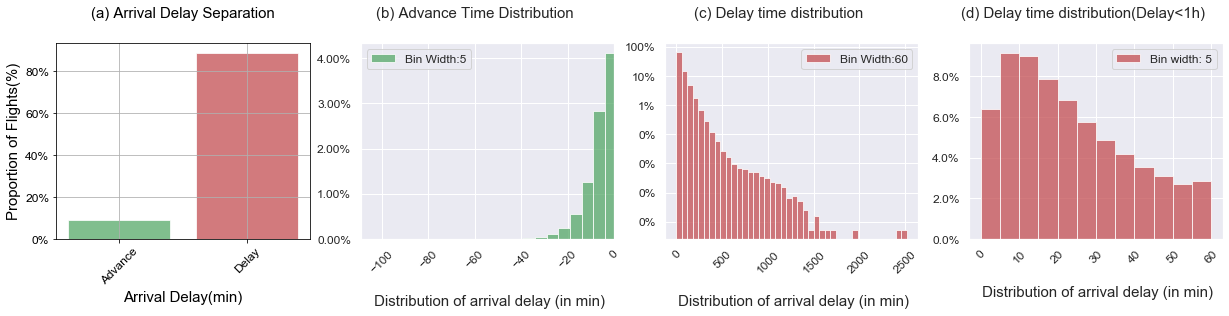

In [11]:
#Load the arrival delay of all the not cancelled flights 
ArrDelay_NotCancelled=data_airline[data_airline.Cancelled==0]['ArrDelay'];
NumberOfTotalFlights_NotCancelled=np.size(ArrDelay_NotCancelled);
#First measure the proportion of flights iwth arrival delay<0 and the proportion of flights iwth arrival delay>0
NumOfNegativeArrDelay=np.sum(ArrDelay_NotCancelled<0)
NumOfPositiveArrDelay= np.sum(ArrDelay_NotCancelled>0)
PropOfNegativeArrDelay=NumOfNegativeArrDelay/NumberOfTotalFlights_NotCancelled
PropOfPositiveArrDelay=NumOfPositiveArrDelay/NumberOfTotalFlights_NotCancelled
print('Number of advance arrival cases is', NumOfNegativeArrDelay,'\nNumber of delayed arrival cases is',NumOfPositiveArrDelay)
print('Propotion of advance arrival cases is', PropOfNegativeArrDelay,'\nPropotion of delayed arrival cases is',PropOfPositiveArrDelay)

# (a) Make a bar plot of the number of flights arrived in advance   
plt.subplot(1,4,1)
sns.set()
plt.bar([1,2],[PropOfNegativeArrDelay,PropOfPositiveArrDelay],color=['g','r'],alpha=0.75);
plt.xticks([1,2],['Advance','Delay'],rotation=45,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('Arrival Delay(min)',fontsize=15,x=0.5,y=-0.5);
plt.ylabel('Proportion of Flights(%)',fontsize=15,x=-10,y=0.5);
plt.subplots_adjust(bottom=0.2) # make room for x-axis labels
plt.title('(a) Arrival Delay Separation',fontsize=15,x=0.5,y=1.1);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)

# (b) Plot the distribution of those flights arrived in advance
AdvanceTime=ArrDelay_NotCancelled[ArrDelay_NotCancelled<0];
Advance_Min=np.min(AdvanceTime)
BinWidth_Advance=5 #Width of the bin for the histogram 
Bin_Advance=np.arange(Advance_Min,BinWidth_Advance,BinWidth_Advance)
histAdvance,bins=np.histogram(AdvanceTime,bins=Bin_Advance)
plotedge=bins[:-1]
histAdvance=histAdvance/NumberOfTotalFlights_NotCancelled #Change the number of cases into the propotion

plt.subplot(1,4,2)
sns.set()
plt.bar(plotedge, histAdvance, align='edge', width=BinWidth_Advance,color='g',alpha=0.75)
plt.xlim([Advance_Min,0])
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\n Distribution of arrival delay (in min)',fontsize=15,x=0.5,y=-0.5)
label='Bin Width:'+str(BinWidth_Advance)
plt.legend([label],fontsize=12)
plt.title('(b) Advance Time Distribution',fontsize=15,x=0.45,y=1.1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.subplots_adjust(left=-1.8) # make room for yticks 

# (c) Plot the distribution of those flights arrived delayed 
DelayTime=ArrDelay_NotCancelled[ArrDelay_NotCancelled>0];
Delay_Max=np.max(DelayTime)
BinWidth_Delay=60 #Width of the bin for the histogram 
Bin_Delay=np.arange(0,Delay_Max+BinWidth_Delay,BinWidth_Delay)
histDelay,bins=np.histogram(DelayTime,bins=Bin_Delay)
plotedge=bins[:-1]
histDelay=histDelay/NumberOfTotalFlights_NotCancelled #Change the number of cases into the propotion

plt.subplot(1,4,3)
sns.set()
plt.bar(plotedge, histDelay, align='edge',log=True, width=BinWidth_Delay,color='r',alpha=0.75)
plt.xticks(rotation=45,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('\n Distribution of arrival delay (in min)',fontsize=15,x=0.5,y=-0.5);
label='Bin Width:'+str(BinWidth_Delay)
plt.legend([label],fontsize=12);
plt.title('(c) Delay time distribution',fontsize=15,x=0.45,y=1.1);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# (d) Plot the distribution of those flight delayed within one hour
DelayTimeWithinOneHour=DelayTime[DelayTime<60.1]
Bin_Delay_Short=np.arange(0,65,5)
histDelayShort,bins=np.histogram(DelayTimeWithinOneHour,bins=Bin_Delay_Short)
histDelayShort=histDelayShort/NumberOfTotalFlights_NotCancelled
plotedge=bins[:-1]
plt.subplot(1,4,4)
sns.set()
plt.bar(plotedge, histDelayShort, align='edge', width=5,color='r',alpha=0.75)
plt.xticks(rotation=45,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('\n Distribution of arrival delay (in min)',fontsize=15,x=0.5,y=-0.5);
plt.legend(['Bin width: 5'],fontsize=12);
plt.title('(d) Delay time distribution(Delay<1h)',fontsize=15,x=0.45,y=1.1);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

* According to the above figure
<br>
* **(a)** Among all the flights which were not cancelled, the proportion of advance arrival cases is small, only occupies 9% of the whole cases.
* **(b)** The advanced time is limited, ranging from 35 minutes to 0, with most cases distributed within 15 minutes. This advance distribution around zero can be used as a reference to determin the time period considered as normal on-time.  
* **(c)** The delayed time is widely distributed, while the most frequent cases show a delay within 60 minutes.
* **(d)** To take a detail look at the delay time distribution within one hour, the most cases have a delay within 20minutes.
* **It seems that flgiht arrival delay is quite normal within the rage [-20min to 20min].**
* **But there is one problem, the arrival delay may be related to the full flight duraiton.**
* **For example, if the total flight duration is only one hour, and the arrival delay of half an hour becomes more serious compared to the condition where the total flight duraiton is 4-5 hours.**
* **Therefore, for the next step, I'll first check the relationship between the regular flight duration (_CRSElapsedTime_) and the arrival delay.**
* **Then, the arrival-delay will be normalized by the CRSEElapsedTime.**

#### 7.1.2) The distribution of the arrival delay percentage relative to the whole journey
* As mentioned above, it's more resonable to define the arrival delay of the flight relative to the whole flight duration. It's more unacceptable for longer delays if the flight journel is too short.
* First, take a brief look at the relationship between the CRSElapsedTime and the DelayTime for those uncancelled flights.
* Then, normalize the Arrival Delay by the CRSElapsedTime.

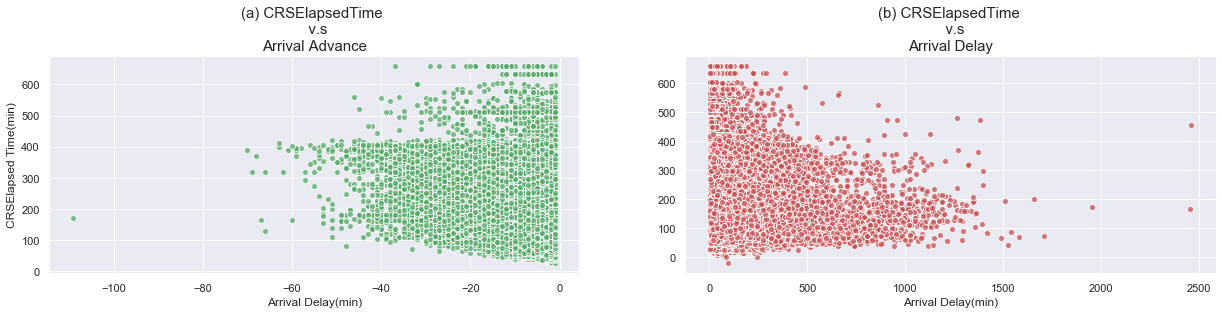

In [12]:
#Load the arrival delay and crselapstime into a dataframe for scatter plot
ExamineArrDelAndCRSElapse=data_airline.loc[data_airline.Cancelled==0,['ArrDelay','CRSElapsedTime']] 

#Scatter plot for CRSElapsed Time v.s. Arrival Advance and Delay respectively
plt.subplot(1,2,1)
sns.set()
plt.scatter(ExamineArrDelAndCRSElapse.loc[ExamineArrDelAndCRSElapse['ArrDelay']<0]['ArrDelay'],ExamineArrDelAndCRSElapse.loc[ExamineArrDelAndCRSElapse['ArrDelay']<0]['CRSElapsedTime'],color='g',edgecolors='w',alpha=0.75)
plt.xlabel('Arrival Delay(min)',fontsize=12)
plt.ylabel('CRSElapsed Time(min)',fontsize=12)
plt.title('(a) CRSElapsedTime \n   v.s \nArrival Advance',fontsize=15);

plt.subplot(1,2,2)
sns.set()
plt.scatter(ExamineArrDelAndCRSElapse.loc[ExamineArrDelAndCRSElapse['ArrDelay']>0]['ArrDelay'],ExamineArrDelAndCRSElapse.loc[ExamineArrDelAndCRSElapse['ArrDelay']>0]['CRSElapsedTime'],color='r',edgecolors='w',alpha=0.75)
plt.xlabel('Arrival Delay(min)',fontsize=12)
plt.title('(b) CRSElapsedTime \n   v.s \nArrival Delay',fontsize=15);
plt.subplots_adjust(left=-1.8) # make room for yticks 

* From the above figure, it's apparently that the dots distributed on the right down corner are more severious condition
* Next, normalize the arrival delay by the CRSElapsedTime

In [13]:
# Add a new column called the relative delay to store the relative arrival delay
data_airline['RelativeArrDel']=data_airline['ArrDelay']/data_airline['CRSElapsedTime']
#Replot the distribution of the Relative Arrival Delay again
RelativeArrDel=data_airline[data_airline.Cancelled==0]['RelativeArrDel']

In [14]:
#Histograme for advance
AdvanceTimeRel=RelativeArrDel[ArrDelay_NotCancelled<0];
AdvanceRel_Min=round(np.min(AdvanceTimeRel),1)
BinWidth_AdvanceRel=0.1
Bin_AdvanceRel=np.arange(AdvanceRel_Min-BinWidth_AdvanceRel,BinWidth_AdvanceRel,BinWidth_AdvanceRel)
histAdvanceRel,bins=np.histogram(AdvanceTimeRel,bins=Bin_AdvanceRel)
histAdvanceRel=histAdvanceRel/NumberOfTotalFlights_NotCancelled

#Histograme for delay with refdelay
DelayTimeRel=RelativeArrDel[ArrDelay_NotCancelled>0];
DelayRel_Max=np.max(DelayTimeRel)
BinWidth_DelayRel=1
Bin_DelayRelAbove1=np.arange(1,DelayRel_Max+BinWidth_DelayRel,BinWidth_DelayRel)
histDelayRel,bins=np.histogram(DelayTimeRel,bins=Bin_DelayRelAbove1)
histDelayRel=histDelayRel/NumberOfTotalFlights_NotCancelled
plotedge_Fig2=Bin_DelayRelAbove1[:-1]

#Histograme for delay with refdelay<1
DelayTimeRelWithin1=DelayTimeRel[DelayTimeRel<1]
Bin_DelayRelWithin1=np.arange(0,1+BinWidth_AdvanceRel,BinWidth_AdvanceRel)
histDelayRelWithin1,bins=np.histogram(DelayTimeRelWithin1,bins=Bin_DelayRelWithin1)
histDelayRelWithin1=histDelayRelWithin1/NumberOfTotalFlights_NotCancelled

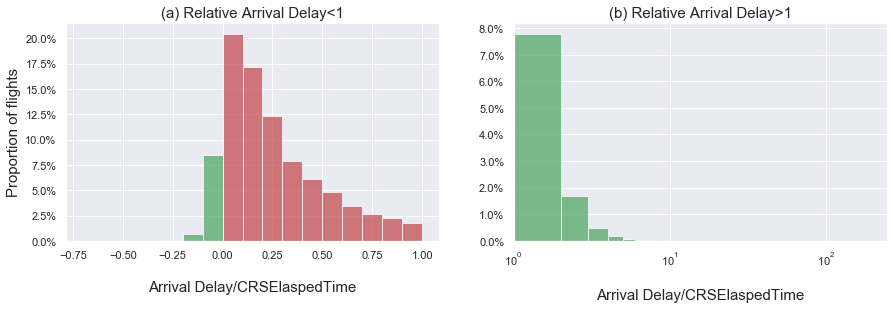

In [15]:
#First put the histogram of Advance and Delay<1 together
plotedge_Fig1=np.concatenate((Bin_AdvanceRel[:-1],Bin_DelayRelWithin1[:-1]))
histDelayRelWithin1All=np.concatenate((histAdvanceRel,histDelayRelWithin1))
# Make a bar plot
Color=['g']*np.size(Bin_AdvanceRel[:-1])+['r']*np.size(Bin_DelayRelWithin1[:-1])
plt.subplot(1,2,1)
sns.set()
plt.bar(plotedge_Fig1,histDelayRelWithin1All, align='edge', width=BinWidth_AdvanceRel,color=Color,alpha=0.75);
plt.xlabel('\nArrival Delay/CRSElaspedTime',fontsize=15)
plt.ylabel('Proportion of flights',fontsize=15)
plt.title('(a) Relative Arrival Delay<1',fontsize=15);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#Plot the rest relative delays

plt.subplot(1,2,2)
sns.set()
plt.bar(plotedge_Fig2,histDelayRel, align='edge',width=BinWidth_DelayRel,color='g',alpha=0.75);
plt.xlim(1,DelayRel_Max+BinWidth_AdvanceRel)
plt.xlabel('\nArrival Delay/CRSElaspedTime',fontsize=15)
plt.title('(b) Relative Arrival Delay>1',fontsize=15);
plt.xscale('log')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.subplots_adjust(left=-1) # make room for yticks 



* According to (a), it seems that most flight delayed within 0.2 times the whole schedualed flight duraition.
* Longer delays above 1 only occpupied a small proportion of the flight population.
* But according to (b), among all the delayed flights, there are still rare cases which arrival delay can be longer that 2 times the whole flgiht duration. 

#### **Therefore, in the following, the flights whose arrival delay within 1.5 times schedualed flgiht duration will be defined as on-time flights,** 
#### **and the rest will be defined as delayed flights**  

* Add a new column to indicate flight state
* Flight state: **0--On time; 1--Delayed; 2--Cancelled**

In [16]:
data_airline['FlightState']=data_airline.RelativeArrDel>0.15 #Assign value 1 to indicate Delayed flight
data_airline['FlightState']=data_airline['FlightState'].astype(int)
data_airline.loc[data_airline['Cancelled']==1,'FlightState']=2 #Assign value 2 to indicate Cancelled flight

### **7.2) Overview of the parameters related to each flight status**
#### 7.2.1) Distribution of each flight status

* Donut chart of the flight status

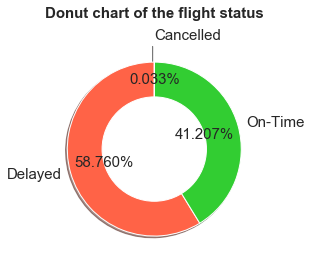

In [17]:
Status=data_airline['FlightState'].value_counts()
#To make a donut char plot
plt.title('Donut chart of the flight status\n',fontsize=15, fontweight='bold')
plt.pie(Status, explode=(0, 0, 0.2)  , labels=['Delayed', 'On-Time', 'Cancelled'], autopct='%1.3f%%',
        shadow=True, startangle=90,colors=['tomato','limegreen','k'],textprops={'fontsize': 15});
centre_circle = plt.Circle((0,0),0.6,fc='white');
plt.gca().add_artist(centre_circle);


* Overall, according to our criteria, almost half of the flights are arrived on-time.

#### 7.2.2) Re-examination of the arrival delayed of each flight status

Text(0, 0.5, 'Proportion of flights \nfor each flight state')

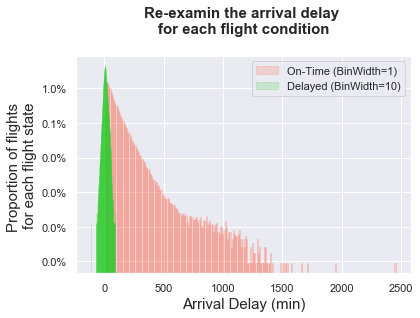

In [18]:
#Re-examination of the raw arrival delays and the depature delays
Delay_Status=data_airline[['ArrDelay','FlightState']];
Delayed=Delay_Status[Delay_Status['FlightState']==1]['ArrDelay'];
On_Time=Delay_Status[Delay_Status['FlightState']==0]['ArrDelay'];
Hist_Bin_Delayed=np.arange(np.min(Delayed),np.max(Delayed),10);

plt.title('Re-examin the arrival delay \nfor each flight condition\n',fontsize=15, fontweight='bold')
plt.hist(Delayed,bins=Hist_Bin_Delayed,density=True,log=True,color='tomato',edgecolor='tomato',alpha=0.2);
plt.yscale('log')
Hist_Bin_OnTime=np.arange(np.min(On_Time),np.max(On_Time),1);
plt.hist(On_Time,bins=Hist_Bin_OnTime,density=True,log=True,color='limegreen',edgecolor='limegreen',alpha=0.2);
plt.legend(['On-Time (BinWidth=1)','Delayed (BinWidth=10)']);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Arrival Delay (min)',fontsize=15)
plt.ylabel('Proportion of flights \nfor each flight state',fontsize=15)


* Re-examination of the arrival delay distribution for on-time and delayed flights respectively indicates a clear seperation between the status.
* The criterium seperating the on-time flight and the delayed flight is valid.

#### 7.2.3) Factors which lead to a flight delay

* The dataset provides five factors that may affect the flight:
<br>
CarrierDelay, WeatherDelay, NASDelay,SecurityDelay, LateAircraftDelay.
<br>
* The definition of these delay reasons can be found https://aspmhelp.faa.gov/index.php/Types_of_Delay
* Here are a few examples: 
* **Carrier Delay:**
<br>
  Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, et.al.
* **Late Arrival Delay:**
<br>
  Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.
* **NAS (National Airspace System) Delay:**
<br>
 For example, non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. 
* **Security Delay:** 
<br>
Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
* **Weather Delay:** 
<br>
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
* In the following, how much those factors would lead to flight delayes will be explored. 

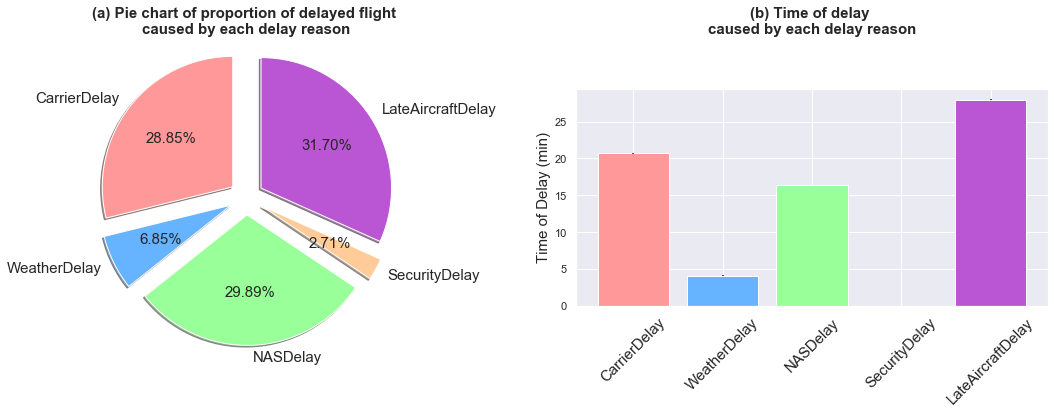

In [19]:
# Select the delay reason columns for the delayed flights 
DelayLabels=['CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
DelayedInformation=data_airline.loc[data_airline['FlightState']==1,DelayLabels]
#Remove the null values
DelayedInformation.dropna()
# Count the non-zero value for each delay reasons
DelayReasonCount=DelayedInformation.astype(bool).sum(axis=0)
#Figure 1, a pie char plot about the proportion of delayed flights caused by each delay reason
plt.subplot(1,2,1)
explode=(0.2, 0.2, 0.2,0.2,0.2)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','mediumorchid']

plt.title('(a) Pie chart of proportion of delayed flight \ncaused by each delay reason\n\n\n',fontsize=15, fontweight='bold')
plt.pie(DelayReasonCount, explode=explode, labels=DelayLabels, autopct='%1.2f%%',
        shadow=True, colors=colors,startangle=90,textprops={'fontsize': 15},radius=1.5);
#Figure 2, average time delayed due to each delay reasons
DelayReasonTime_mean=DelayedInformation.mean()
DelayReasonTime_sem=DelayedInformation.std()/np.sqrt(DelayReasonCount)
plt.subplot(1,2,2)
sns.set()
plt.title('(b) Time of delay \ncaused by each delay reason\n\n\n',fontsize=15, fontweight='bold')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','mediumorchid']
plt.xticks(rotation=45,fontsize=15)
#plt.box(DelayLabels,DelayReasonTime_mean)
plt.bar(DelayLabels,DelayReasonTime_mean,yerr=DelayReasonTime_sem,color=colors)
plt.ylabel('Time of Delay (min)',fontsize=15)
plt.subplots_adjust(left=-1.5) # make room for yticks 

* For the delayed flights, Late aircraft delay, carrier and the NAS are the three main reason that cause a delay.

#### 7.2.3) Factors which lead to a flight cancel

In [20]:
CancellationCode=data_airline['CancellationCode'].value_counts()
print(CancellationCode[1:])

B    307
A    246
C     80
Name: CancellationCode, dtype: int64


* The cancel reasons are provided by the cancellation code.
* A = carrier, B = weather, C = NAS, D = security
* The current dataset only contains the former three

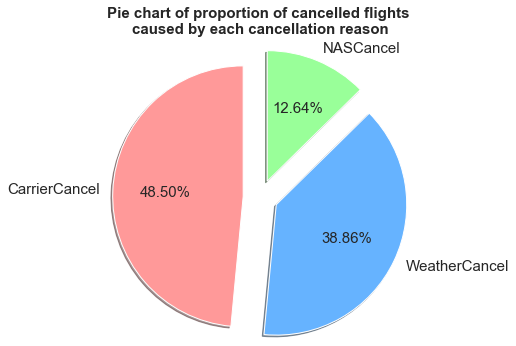

In [21]:
#Load the cancellation code counts 
CancellationCodeCounts=CancellationCode[1:]
explode=(0.2, 0.2, 0.2)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','mediumorchid']

plt.title('Pie chart of proportion of cancelled flights \ncaused by each cancellation reason\n\n\n',fontsize=15, fontweight='bold')
plt.pie(CancellationCodeCounts, explode=explode, labels=['CarrierCancel','WeatherCancel','NASCancel'], autopct='%1.2f%%',
        shadow=True, colors=colors,startangle=90,textprops={'fontsize': 15},radius=1.5);


* Compared to the delay flights, carrier and the weather issue is the major factor that led to the cancellation. 

## **8) The features related to the flight status**

### 8.1) Pre-screen the focused features 

In [22]:
data_airline.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'RelativeArrDel', 'FlightState'],
      dtype='object')

* There are 30 columns in the original datasets, which means there are 30 features at most, but some of them are useless for the classifier and can be removed.
* I. The label column _Unnamed: 0_ and the _Year_ appaarently need to be removed.
* II. the _ArrDelay_ and _RelativeArrDel_ which were used for state classification can also be removed.
* III. Other irrelavent factors like _FlightNum_ , _TailNum_, _Diverted_(no insteret for a moment) also need removal.
* IV. As we have defined a new column _FlightState_ , columns like _Cancelled_, _CancellationCode_, _CarrierDelay_, _WeatherDelay_, _NASDelay_, _SecurityDelay_, _LateAircraftDelay_,  _RelativeArrDel_ can also be removed.
* V. For those cancelled flights, there is no arrival time, so the column _ArrTime_ also need to be removed.
* VI. The _month_ and the _DayofMonth_ can be integrated
* VII. Last, drop the flight state from the feature, as it is the _y_

In [35]:
flight_features=data_airline #First load all the features 
drop_features=['Unnamed: 0','Year','ArrDelay','RelativeArrDel','FlightNum' , 'TailNum', 'Diverted','Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'RelativeArrDel', 'ArrTime'  ]  #Use a list to store the feature name not needed
flight_features= flight_features.drop(drop_features, axis=1) # Delete all columns with the label 
flight_features['Date']=flight_features['Month']*100+flight_features['DayofMonth'] #Use a four digits number to represent date
flight_features= flight_features.drop(['Month','DayofMonth'], axis=1) # the dayofmonth and month
y=flight_features['FlightState'] #Define the y
flight_features= flight_features.drop(['FlightState'], axis=1) # drop y
flight_features.head()

,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Date
0,4,2003.0,1955,2225,WN,128.0,150.0,116.0,8.0,IAD,TPA,810,4.0,8.0,103
1,4,754.0,735,1000,WN,128.0,145.0,113.0,19.0,IAD,TPA,810,5.0,10.0,103
2,4,628.0,620,750,WN,96.0,90.0,76.0,8.0,IND,BWI,515,3.0,17.0,103
3,4,1829.0,1755,1925,WN,90.0,90.0,77.0,34.0,IND,BWI,515,3.0,10.0,103
4,4,1940.0,1915,2110,WN,101.0,115.0,87.0,25.0,IND,JAX,688,4.0,10.0,103


### 8.2) Handle the categorial features 
* For this section, I'll first check the basic properties of those non-numeric categorical features such as the _UniqueCarrier_, _Origin_, _Dest_, .
* And examin whether and how those features differ under different flight states. 
* Then I'll transform those features into binary values. 
#### 8.2.1) How cancellation, delay, ontime rate differed in different carriers, flight origins, and the destinations 

* Compare between UniqueCarriers

In [106]:
data_airline.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'RelativeArrDel', 'FlightState'],
      dtype='object')

In [373]:
#Grouping the data according to unique carrier
CarrierGroup_Total=pd.DataFrame(data_airline.groupby(data_airline['UniqueCarrier']).UniqueCarrier.count())
CarrierGroup_OnTime=pd.DataFrame(data_airline[data_airline.FlightState==0].groupby(data_airline['UniqueCarrier']).UniqueCarrier.count())
CarrierGroup_Delay=pd.DataFrame(data_airline[data_airline.FlightState==1].groupby(data_airline['UniqueCarrier']).UniqueCarrier.count())
CarrierGroup_Cancel=pd.DataFrame(data_airline[data_airline.FlightState==2].groupby(data_airline['UniqueCarrier']).UniqueCarrier.count())

CarrierGroup=pd.concat([CarrierGroup_Total, CarrierGroup_OnTime,CarrierGroup_Delay,CarrierGroup_Cancel],axis = 1,sort=False)
CarrierGroup.columns = ['Total','OnTime','Delay','Cancel']
UniqueCarrier=CarrierGroup_Total.index
CarrierGroup['UniqueCarrier']=UniqueCarrier
CarrierGroup['OnTime']=CarrierGroup['OnTime']/CarrierGroup['Total']*100
CarrierGroup['Delay']=CarrierGroup['Delay']/CarrierGroup['Total']*100
CarrierGroup['Cancel']=CarrierGroup['Cancel']/CarrierGroup['Total']*100
CarrierGroup['Cancel'].fillna(0,inplace=True)
CarrierGroup.drop(['Total'],axis=1)

,OnTime,Delay,Cancel,UniqueCarrier
9E,32.340754,67.547461,0.111786,9E
AA,44.144581,55.831444,0.023975,AA
AQ,39.600000,60.400000,0.000000,AQ
AS,48.769501,51.202504,0.027995,AS
B6,43.091386,56.890536,0.018078,B6
CO,56.577674,43.384400,0.037926,CO
DL,48.279031,51.702586,0.018383,DL
EV,30.383380,69.581201,0.035419,EV
F9,57.094344,42.898581,0.007075,F9
FL,40.365299,59.624881,0.009820,FL


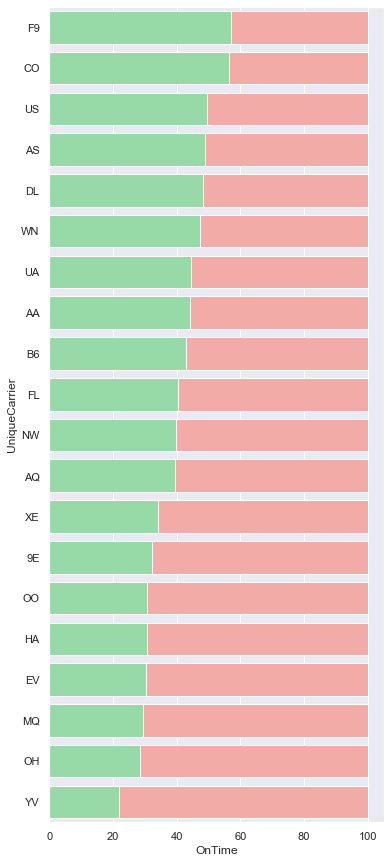

In [377]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
# Load the example car crash dataset
CarrierGroup_plots= CarrierGroup.sort_values("OnTime", ascending=False)
#CarrierGroup_plots['Total']=CarrierGroup_plots['Delay']+CarrierGroup_plots['OnTime']+CarrierGroup_plots['Cancel']
CarrierGroup_plots['Total']=1
CarrierGroup_plots['Delay']=CarrierGroup_plots['Delay']+CarrierGroup_plots['OnTime']

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x="Cancel", y="UniqueCarrier", data=CarrierGroup_plots,
             label="Cancel",color="k");
sns.barplot(x="Delay", y="UniqueCarrier", data=CarrierGroup_plots,
            label="Delay", color="r");
#sns.set_color_codes("muted")
sns.barplot(x="OnTime", y="UniqueCarrier", data=CarrierGroup_plots,
            label="OnTime", color="g");
